## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

## Import Data

Dataset url: https://github.com/abhijitchak103/heart_attack_risk/blob/main/data/train.csv

In [2]:
url = 'data/train.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head().T

,0,1,2,3,4
Patient ID,RDG0550,NMA3851,TUI5807,YYT5016,ZAC5937
Age,33,56,19,50,89
Sex,Male,Female,Female,Female,Female
Cholesterol,200,262,140,163,144
Blood Pressure,129/90,159/105,161/109,120/62,153/110
Heart Rate,48,46,54,53,92
Diabetes,0,1,0,0,1
Family History,1,0,1,1,0
Smoking,1,1,0,1,1
Obesity,1,0,0,1,0


## Data Description

The features for preparing the predictors:

- `Patient ID`: Unique identifier for each patienttack risk (1: Yes, 0: No)ack risk (1: Yes, 0: No)

- `Age`: Age of the patient

- `Sex`: Gender of the patient (Male/Female)

- `Cholesterol`: Cholesterol levels of the patient

- `Blood Pressure`: Blood pressure of the patient (systolic/diastolic)  

- `Heart Rate`: Heart rate of the patient

- `Diabetes`: Whether the patient has diabetes (Yes/No)

- `Family History`: Family history of heart-related problems (1: Yes, 0: No)

- `Smoking`: Smoking status of the patient (1: Smoker, 0: Non-smoker)

- `Obesity`: Obesity status of the patient (1: Obese, 0: Not obese)

- `Alcohol Consumption`: Patient consumes alcohol (Yes/No)

- `Exercise Hours Per Week`: Number of exercise hours per week

- `Diet`: Dietary habits of the patient (Healthy/Average/Unhealthy)

- `Previous Heart Problems`: Previous heart problems of the patient (1: Yes, 0: No)

- `Medication Use`: Medication usage by the patient (1: Yes, 0: No)

- `Stress Level`: Stress level reported by the patient (1-10)

- `Sedentary Hours Per Day`: Hours of sedentary activity per day

- `Income`: Income level of the patient

- `BMI`: Body Mass Index (BMI) of the patient

- `Triglycerides`: Triglyceride levels of the patient

- `Physical Activity Days Per Week`: Days of physical activity per week

- `Sleep Hours Per Day`: Hours of sleep per day

- `Country`: Country of the patient

- `Continent`: Continent where the patient resides

- `Hemisphere`: Hemisphere where the patient resides

Target Feature:

`Heart Attack Risk`: Presence of heart attack risk (1: Yes, 0: No)

## Data Preparation

- Rename Columns to remove spaces and capital letters
- Lowercase string entries in rows and replace spaces with underscores
- Convert numeric categoric entries to stings

In [5]:
df.columns = df.columns.str.replace(" ", '_').str.lower()

In [6]:
categorical = [x for x in df.columns if df[x].dtype == 'O']

In [7]:
for c in categorical:
    df[c] = df[c].str.replace(" ", '_').str.lower()

In [8]:
df.head().T

,0,1,2,3,4
patient_id,rdg0550,nma3851,tui5807,yyt5016,zac5937
age,33,56,19,50,89
sex,male,female,female,female,female
cholesterol,200,262,140,163,144
blood_pressure,129/90,159/105,161/109,120/62,153/110
heart_rate,48,46,54,53,92
diabetes,0,1,0,0,1
family_history,1,0,1,1,0
smoking,1,1,0,1,1
obesity,1,0,0,1,0


In [9]:
df.diabetes.value_counts()

diabetes
1    4576
0    2434
Name: count, dtype: int64

In [10]:
# Diabetes: Whether the patient has diabetes (Yes/No)

diabetes_values = {
    0: 'yes',
    1: 'no'
}
df.diabetes = df.diabetes.map(diabetes_values)
df.diabetes.head()

0    yes
1     no
2    yes
3    yes
4     no
Name: diabetes, dtype: object

In [11]:
df.family_history.value_counts()

family_history
0    3562
1    3448
Name: count, dtype: int64

In [12]:
# Family History: Family history of heart-related problems (1: Yes, 0: No)

family_values = {
    1: 'yes',
    0: 'no'
}
df.family_history = df.family_history.map(family_values)
df.family_history.head()

0    yes
1     no
2    yes
3    yes
4     no
Name: family_history, dtype: object

In [13]:
df.smoking.value_counts()

smoking
1    6283
0     727
Name: count, dtype: int64

In [14]:
# Smoking: Smoking status of the patient (1: Smoker, 0: Non-smoker)

smoking_values = {
    1: 'yes',
    0: 'no'
}
df.smoking = df.smoking.map(smoking_values)
df.smoking.head()

0    yes
1    yes
2     no
3    yes
4    yes
Name: smoking, dtype: object

In [15]:
df.obesity.value_counts()

obesity
0    3506
1    3504
Name: count, dtype: int64

In [16]:
# Obesity: Obesity status of the patient (1: Obese, 0: Not obese)

obesity_values = {
    1: 'yes',
    0: 'no'
}
df.obesity = df.obesity.map(obesity_values)
df.obesity.head()

0    yes
1     no
2     no
3    yes
4     no
Name: obesity, dtype: object

In [17]:
df.alcohol_consumption.value_counts()

alcohol_consumption
1    4177
0    2833
Name: count, dtype: int64

In [18]:
# Alcohol Consumption: Patient consumes alcohol (Yes/No)

alcohol_values = {
    1: 'yes',
    0: 'no'
}

df.alcohol_consumption = df.alcohol_consumption.map(alcohol_values)
df.alcohol_consumption.head()

0    yes
1     no
2    yes
3    yes
4    yes
Name: alcohol_consumption, dtype: object

In [19]:
df.previous_heart_problems.value_counts()

previous_heart_problems
0    3518
1    3492
Name: count, dtype: int64

In [20]:
# Previous Heart Problems: Previous heart problems of the patient (1: Yes, 0: No)

values = {
    1: 'yes',
    0: 'no'
}
df.previous_heart_problems = df.previous_heart_problems.map(values)
df.previous_heart_problems.head()

0     no
1    yes
2    yes
3     no
4    yes
Name: previous_heart_problems, dtype: object

In [21]:
df.medication_use.value_counts()

medication_use
1    3506
0    3504
Name: count, dtype: int64

In [22]:
# Medication Use: Medication usage by the patient (1: Yes, 0: No)

values = {
    1: 'yes',
    0: 'no'
}
df.medication_use = df.medication_use.map(values)
df.medication_use.head()

0    yes
1     no
2    yes
3    yes
4     no
Name: medication_use, dtype: object

In [23]:
df.isnull().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
dtype: int64

We do not have null values

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       7010 non-null   object 
 1   age                              7010 non-null   int64  
 2   sex                              7010 non-null   object 
 3   cholesterol                      7010 non-null   int64  
 4   blood_pressure                   7010 non-null   object 
 5   heart_rate                       7010 non-null   int64  
 6   diabetes                         7010 non-null   object 
 7   family_history                   7010 non-null   object 
 8   smoking                          7010 non-null   object 
 9   obesity                          7010 non-null   object 
 10  alcohol_consumption              7010 non-null   object 
 11  exercise_hours_per_week          7010 non-null   float64
 12  diet                

We see that `blood_pressure` is of type `object` whereas it should be `numeric`. We can correct it by splitting the `systolic` and `diastolic` to different columns.

In [25]:
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(int)

In [26]:
df.head(2)

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk,systolic_bp,diastolic_bp
0,rdg0550,33,male,200,129/90,48,yes,yes,yes,yes,...,30.449815,63,6,7,argentina,south_america,southern_hemisphere,1,129,90
1,nma3851,56,female,262,159/105,46,no,no,yes,no,...,34.973685,333,7,8,nigeria,africa,northern_hemisphere,1,159,105


In [27]:
df.drop(columns = 'blood_pressure', inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       7010 non-null   object 
 1   age                              7010 non-null   int64  
 2   sex                              7010 non-null   object 
 3   cholesterol                      7010 non-null   int64  
 4   heart_rate                       7010 non-null   int64  
 5   diabetes                         7010 non-null   object 
 6   family_history                   7010 non-null   object 
 7   smoking                          7010 non-null   object 
 8   obesity                          7010 non-null   object 
 9   alcohol_consumption              7010 non-null   object 
 10  exercise_hours_per_week          7010 non-null   float64
 11  diet                             7010 non-null   object 
 12  previous_heart_probl

We can get a fairly good idea about `continent` and `hemisphere` from `country`. So we can drop the two features. Also, we can drop `patient_id`.

In [29]:
df.drop(columns = ['continent', 'hemisphere', 'patient_id'], inplace=True)

We can also rename `sex` to `gender`

In [30]:
df.rename(columns = {'sex': 'gender'}, inplace=True)

In [31]:
categorical = [x for x in df.columns if df[x].dtype == 'O']
numerical = [x for x in df.columns if x not in categorical]

assert len(categorical) + len(numerical) == len(df.columns)

## Setting up Validation Framework

In [32]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=12)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=12)

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
y_train = df_train.heart_attack_risk.values
y_val = df_val.heart_attack_risk.values
y_test = df_test.heart_attack_risk.values

In [35]:
del df_train['heart_attack_risk']
del df_val['heart_attack_risk']
del df_test['heart_attack_risk']

In [36]:
len(df_train), len(df_val), len(df_test)

(4206, 1402, 1402)

In [37]:
len(y_train), len(y_val), len(y_test)

(4206, 1402, 1402)

## Exploratory Data Analysis

- Mising Values
- Distribution of Target Variable
- Feature Importance - Mutual Inforamtion
- Feature Importance - Correlation

In [38]:
df_full_train = df_full_train.reset_index(drop=True)

In [39]:
df_full_train.isnull().sum()

age                                0
gender                             0
cholesterol                        0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
heart_attack_risk                  0
systolic_bp                        0
diastolic_bp                       0
dtype: int64

In [40]:
df_full_train.heart_attack_risk.value_counts(normalize=True)

heart_attack_risk
0    0.643723
1    0.356277
Name: proportion, dtype: float64

We can calculate the global heart attack risk rate. `Global` here refers to the entire dataset.

In [41]:
global_heart_attack_risk_rate = df_full_train.heart_attack_risk.mean()
round(global_heart_attack_risk_rate, 4)

0.3563

In [42]:
numerical.remove('heart_attack_risk')
numerical

['age',
 'cholesterol',
 'heart_rate',
 'exercise_hours_per_week',
 'stress_level',
 'sedentary_hours_per_day',
 'income',
 'bmi',
 'triglycerides',
 'physical_activity_days_per_week',
 'sleep_hours_per_day',
 'systolic_bp',
 'diastolic_bp']

### Feature Importance - Risk and Rate

We can check the risk among individual groups now and see how groups influence the risk rate.

In [43]:
df_full_train[categorical].nunique()

gender                      2
diabetes                    2
family_history              2
smoking                     2
obesity                     2
alcohol_consumption         2
diet                        3
previous_heart_problems     2
medication_use              2
country                    20
dtype: int64

In [44]:
from IPython.display import display

In [45]:
categories = categorical.copy()
categories.remove('country')
for c in categories:
    print(c)
    df_group = df_full_train.groupby(c).heart_attack_risk.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_heart_attack_risk_rate
    df_group['risk'] = df_group['mean'] / global_heart_attack_risk_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.356246,1673,-0.000030,0.999914
male,0.356290,3935,0.000013,1.000036



diabetes


,mean,count,diff,risk
diabetes,,,,
no,0.365574,3660,0.009297,1.026095
yes,0.338809,1948,-0.017468,0.950972



family_history


,mean,count,diff,risk
family_history,,,,
no,0.360169,2832,0.003893,1.010926
yes,0.352305,2776,-0.003971,0.988853



smoking


,mean,count,diff,risk
smoking,,,,
no,0.368696,575,0.012419,1.034857
yes,0.354858,5033,-0.001419,0.996018



obesity


,mean,count,diff,risk
obesity,,,,
no,0.361279,2815,0.005002,1.014040
yes,0.351235,2793,-0.005042,0.985849



alcohol_consumption


,mean,count,diff,risk
alcohol_consumption,,,,
no,0.361617,2251,0.005340,1.014989
yes,0.352696,3357,-0.003581,0.989949



diet


,mean,count,diff,risk
diet,,,,
average,0.349232,1887,-0.007045,0.980226
healthy,0.360483,1903,0.004207,1.011807
unhealthy,0.359186,1818,0.002909,1.008165



previous_heart_problems


,mean,count,diff,risk
previous_heart_problems,,,,
no,0.353191,2820,-0.003085,0.991340
yes,0.359397,2788,0.003121,1.008759



medication_use


,mean,count,diff,risk
medication_use,,,,
no,0.356836,2794,0.000559,1.001570
yes,0.355721,2814,-0.000555,0.998441


We cannot clearly see a demarcation on which group influences the risk of heart attacks among the various categorical features.

### Feature Importance - Mutual Information

`Mutual Information` measures how much information we can gather by studying another variable.

In [46]:
def mutual_score(series):
    return mutual_info_score(series, df_full_train.heart_attack_risk)

In [47]:
mi = df_full_train[categorical].apply(mutual_score)
mi_sorted = mi.sort_values(ascending=False)

In [48]:
mi_5 = mi_sorted.index[:5]
mi_5

Index(['country', 'diabetes', 'diet', 'obesity', 'alcohol_consumption'], dtype='object')

The top 5 categorical features for providing information about `heart attack risk` are:
`country`, `diabetes`, `diet`, `obesity` and `alcohol_consumption`

### Feature Importance - Correlation

For numerical features, we can use correlation values.

In [49]:
corr = df_full_train[numerical].corrwith(df_full_train.heart_attack_risk).abs()
corr_sorted = corr.sort_values(ascending=False)

In [50]:
corr_sorted

cholesterol                        0.032426
systolic_bp                        0.021046
sleep_hours_per_day                0.019914
triglycerides                      0.019216
income                             0.014124
age                                0.010623
physical_activity_days_per_week    0.007483
bmi                                0.006868
stress_level                       0.004424
sedentary_hours_per_day            0.004416
exercise_hours_per_week            0.004354
diastolic_bp                       0.003259
heart_rate                         0.000885
dtype: float64

In [51]:
corr_5 = corr_sorted.index[:5]
corr_5

Index(['cholesterol', 'systolic_bp', 'sleep_hours_per_day', 'triglycerides',
       'income'],
      dtype='object')

The top 5 numerical features for providing information about `heart attack risk` are:
`cholesterol`, `systolic_bp`, `sleep_hours_per_day`, `triglycerides` and `income`

## Encoding Variables

In [52]:
dv = DictVectorizer(sparse=False)

In [53]:
features_top_10 = list(corr_5) + list(mi_5)

In [54]:
# Training with Top 5 features of Categorical and Numerical

train_dicts_10 = df_train[features_top_10].to_dict(orient='records')
X_train_10 = dv.fit_transform(train_dicts_10)

val_dicts_10 = df_val[features_top_10].to_dict(orient='records')
X_val_10 = dv.transform(val_dicts_10)

In [55]:
# Training all the features

train_dicts = df_train[categorical +numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Logistic Regression

In [56]:
score = {}

In [57]:
lr = LogisticRegression()

In [58]:
lr.fit(X_train_10, y_train)

LogisticRegression()

In [59]:
y_pred = lr.predict_proba(X_val_10)[:, 1]

In [60]:
score['log_reg_10'] = roc_auc_score(y_val, y_pred)
score['log_reg_10']

0.46926453707357313

In [61]:
lr.fit(X_train, y_train)
y_pred = lr.predict_proba(X_val)[:, 1]

In [62]:
score['log_reg'] = roc_auc_score(y_val, y_pred)
score['log_reg']

0.48578128923485303

The model with full set of features does around 2% better than only selected features

### Tuning Logistic Regression Model

- Solvers

In [63]:
solvers = ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga', 'lbfgs']

In [64]:
for s in solvers:
    lr = LogisticRegression(solver=s, max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f'solver: {s} --> auc: {auc}')
    if auc > score['log_reg']:
        score['log_reg'] = auc    

solver: liblinear --> auc: 0.4840594396814578
solver: newton-cg --> auc: 0.5026545180614843
solver: newton-cholesky --> auc: 0.5028159414571152
solver: sag --> auc: 0.47053574631416584
solver: saga --> auc: 0.4710872762492377
solver: lbfgs --> auc: 0.48578128923485303


So, the `newton-cholesky` does the best in increasing auc scores.

We can try, with using `None` penalty as by default `l2` is being used.

In [65]:
for p in ['l2', None]:
    lr = LogisticRegression(solver='newton-cholesky', penalty=p, max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f'penalty: {p} --> auc: {auc}')
    if auc > score['log_reg']:
        score['log_reg'] = auc

penalty: l2 --> auc: 0.5028159414571152
penalty: None --> auc: 0.4870838863579295


As the `l2` penalty has better auc. We fix the `Logistic Regression` model at:
```python
    LogisticRegression(solver='newton-cholesky', penalty='l2', max_iter=10000)
```

### Logistic Regression with Feature Scaling

In [66]:
def scale_numeric(df_in, numeric_features, categoric_features, scaler = StandardScaler()):
    numeric_df = df_in[numeric_features]
    categoric_df = df_in[categoric_features]
    train_data = scaler.fit(numeric_df)
    train_data = scaler.transform(numeric_df)
    numeric_df = pd.DataFrame(train_data, columns = numeric_features)
    df_out = pd.concat([numeric_df, categoric_df], axis=1)
    return df_out, scaler

In [67]:
df_train_scale, scaler = scale_numeric(df_train, numerical, categorical)

In [68]:
def scale_val(df_in, numeric_features, categoric_features, scaler):
    numeric_df = df_in[numeric_features]
    categoric_df = df_in[categoric_features]
    numeric_df = pd.DataFrame(scaler.transform(numeric_df), columns = numeric_features)
    df_out = pd.concat([numeric_df, categoric_df], axis=1)
    return df_out

In [69]:
df_val_scale = scale_val(df_val, numerical, categorical, scaler)

In [70]:
dv = DictVectorizer(sparse=False)
train_dicts_scale = df_train_scale[categorical +numerical].to_dict(orient='records')
X_train_scale = dv.fit_transform(train_dicts_scale)

val_dicts_scale = df_val_scale[categorical + numerical].to_dict(orient='records')
X_val_scale = dv.transform(val_dicts_scale)

In [71]:
lr = LogisticRegression(solver='newton-cholesky', penalty='l2', max_iter=10000)

In [72]:
lr.fit(X_train_scale, y_train)
y_pred = lr.predict_proba(X_val_scale)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.5027800695914195

Feature Scaling does not improve the model performance. So we stick with the data without Scaling.

## Decision Trees

In [77]:
dt_10 = DecisionTreeClassifier()
dt = DecisionTreeClassifier()

In [78]:
dt_10.fit(X_train_10, y_train)
y_pred = dt_10.predict_proba(X_val_10)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.49023388456433625

In [79]:
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.4986480790615919

We can see that the Decision Tree with all features work slightly better. We can further tune the model.

## Parameter Tuning for Decision Trees

- `Criterion`: [`gini`, `entropy`, `log_loss`]

In [82]:
criteria = ['gini', 'entropy', 'log_loss']

In [93]:
for c in criteria:
    dt = DecisionTreeClassifier(criterion=c,
                                random_state=12)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"Criterion: {c:>8}\t-->\tAUC: {round(auc,4)}")

Criterion:     gini	-->	AUC: 0.4919
Criterion:  entropy	-->	AUC: 0.4905
Criterion: log_loss	-->	AUC: 0.4905


We can stick with `gini` as the criteria.

- `max_depth`: [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, None]

In [94]:
depth = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200, None]

In [98]:
for d in depth:
    dt = DecisionTreeClassifier(criterion='gini',
                                max_depth=d,
                                random_state=12)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"Max_depth: {d}\t-->\tAUC: {round(auc,4)}")

Max_depth: 1	-->	AUC: 0.4917
Max_depth: 2	-->	AUC: 0.5193
Max_depth: 3	-->	AUC: 0.525
Max_depth: 4	-->	AUC: 0.5286
Max_depth: 5	-->	AUC: 0.5006
Max_depth: 10	-->	AUC: 0.4709
Max_depth: 20	-->	AUC: 0.4874
Max_depth: 30	-->	AUC: 0.498
Max_depth: 40	-->	AUC: 0.4919
Max_depth: 50	-->	AUC: 0.4919
Max_depth: 100	-->	AUC: 0.4919
Max_depth: 200	-->	AUC: 0.4919
Max_depth: None	-->	AUC: 0.4919


`max_depth` = 4

- `min_samples_leaf`: [1, 2, 3, 4, 5, 10]

In [103]:
leaves = [1, 2, 3, 4, 5, 10, 50, 100, 200, 500]

In [104]:
for l in leaves:
    dt = DecisionTreeClassifier(criterion='gini',
                                max_depth=4,
                                min_samples_leaf=l,
                                random_state=12)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"Min_sampples_leaf: {l:>3}\t-->\tAUC: {round(auc,4)}")

Min_sampples_leaf:   1	-->	AUC: 0.5286
Min_sampples_leaf:   2	-->	AUC: 0.5286
Min_sampples_leaf:   3	-->	AUC: 0.5286
Min_sampples_leaf:   4	-->	AUC: 0.5275
Min_sampples_leaf:   5	-->	AUC: 0.5267
Min_sampples_leaf:  10	-->	AUC: 0.5239
Min_sampples_leaf:  50	-->	AUC: 0.5053
Min_sampples_leaf: 100	-->	AUC: 0.5084
Min_sampples_leaf: 200	-->	AUC: 0.5049
Min_sampples_leaf: 500	-->	AUC: 0.5066


`min_sample_leaf` of 1, 2 and 3 have similar scores. We can go with 2.

Further we can combine and check for combinations of `max_depth` and `min_samples_leaf`.

In [110]:
dt_scores = []
for d in [2,3,4,5,6,7, 8, 9, 10, 20, None]:
    for l in [1,2,3,4,5,10,15,20,30,40,50]:
        dt = DecisionTreeClassifier(criterion='gini',
                                max_depth=d,
                                min_samples_leaf=l,
                                random_state=12)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        dt_scores.append((d, l, round(auc, 4)))
        # print(f"Min_sampples_leaf: {l:>3}\t-->\tAUC: {round(auc,4)}")

df_dt = pd.DataFrame(dt_scores, columns = ['max_depth', 'min_samples_leaf', 'auc'])
df_dt.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
28,4.0,15,0.5329
29,4.0,20,0.5317
22,4.0,1,0.5286
23,4.0,2,0.5286
24,4.0,3,0.5286


In [111]:
dt_pivot = df_dt.pivot(index='min_samples_leaf', columns='max_depth', values='auc')
dt_pivot

max_depth,NaN,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0
min_samples_leaf,,,,,,,,,,,
1,0.4919,0.5193,0.5250,0.5286,0.5006,0.4994,0.5222,0.4677,0.4980,0.4709,0.4874
2,0.4894,0.5193,0.5250,0.5286,0.5006,0.4972,0.5175,0.4698,0.4900,0.4721,0.4725
3,0.4980,0.5193,0.5250,0.5286,0.5006,0.4972,0.5183,0.4694,0.4977,0.4876,0.4765
4,0.4859,0.5193,0.5250,0.5275,0.4917,0.5074,0.5122,0.4806,0.4901,0.4847,0.4869
5,0.4866,0.5193,0.5243,0.5267,0.4951,0.5089,0.5161,0.4801,0.4963,0.4805,0.4909
10,0.4974,0.5193,0.5245,0.5239,0.4974,0.5082,0.5094,0.4974,0.4967,0.4899,0.4974
15,0.5148,0.5193,0.5245,0.5329,0.5010,0.4979,0.4987,0.4833,0.4901,0.4993,0.5148
20,0.5156,0.5193,0.5233,0.5317,0.4992,0.4890,0.5007,0.4892,0.4959,0.4998,0.5156
30,0.4925,0.5193,0.5214,0.5053,0.4846,0.4868,0.4958,0.4840,0.4909,0.4910,0.4925


<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>

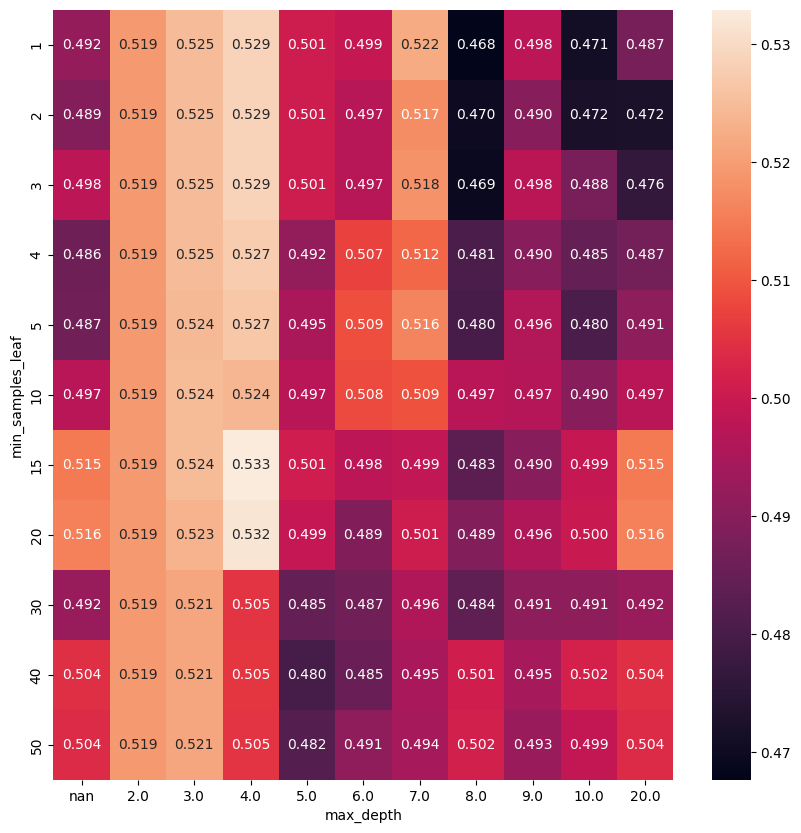

In [114]:
plt.figure(figsize =(10,10))
sns.heatmap(dt_pivot, annot=True, fmt='.3f')

As evident from the heatmap, the `max_depth` of 4 and `min_samples_leaf` of 15 yields the best model out of the ranges tested. We finalize our `DecisionTreeClassifier` model as:

```python
DecisionTreeClassifier(criterion='gini',
                       max_depth=4,
                       min_samples_leaf=15,
                       random_state=12)
```

In [117]:
dt = DecisionTreeClassifier(criterion='gini',
                       max_depth=4,
                       min_samples_leaf=15,
                       random_state=12)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
score['dt'] = auc
print(f"AUC Score with Decision Tree Classifier is: {auc}")

AUC Score with Decision Tree Classifier is: 0.532856386985687


## Random Forest Classifier

In [119]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f"{auc=}")

auc=0.48415248233310615


### Random Forest Tuning

- `n_estimators`

In [127]:
estimators = range(10, 201, 10)

,n_estimators,auc
0,10,0.499669
1,20,0.515520
2,30,0.512441
3,40,0.511488
4,50,0.505911
5,60,0.504846
6,70,0.499429
7,80,0.491465
8,90,0.490109
9,100,0.493933


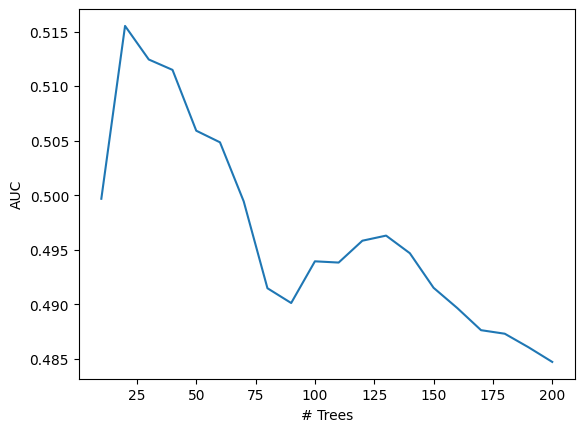

In [128]:
scores_rf = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    # print(f"Estimators: {n:>3}, AUC: {round(auc, 3)}")
    scores_rf.append((n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['n_estimators', 'auc'])
display(df_scores)

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("# Trees")
plt.ylabel("AUC")
plt.show()

We can refine the `n_estimators` by magnifying the scope between 10 and 30.

In [129]:
estimators = range(10, 31, 2)

,n_estimators,auc
0,10,0.499669
1,12,0.507013
2,14,0.513018
3,16,0.515186
4,18,0.511769
5,20,0.515520
6,22,0.520996
7,24,0.519496
8,26,0.508553
9,28,0.515518


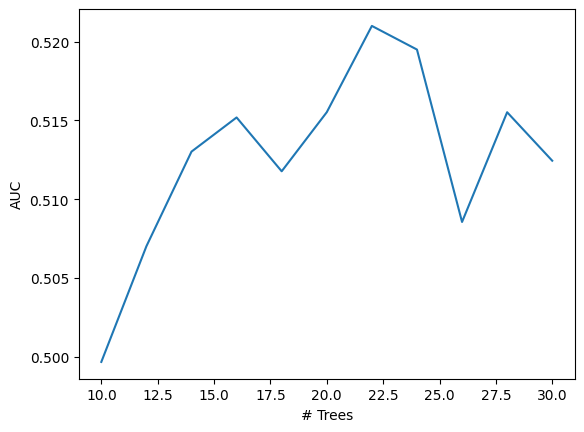

In [130]:
scores_rf = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    # print(f"Estimators: {n:>3}, AUC: {round(auc, 3)}")
    scores_rf.append((n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['n_estimators', 'auc'])
display(df_scores)

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("# Trees")
plt.ylabel("AUC")
plt.show()

In [131]:
estimators = range(20, 25, 1)

,n_estimators,auc
0,20,0.515520
1,21,0.521122
2,22,0.520996
3,23,0.519231
4,24,0.519496


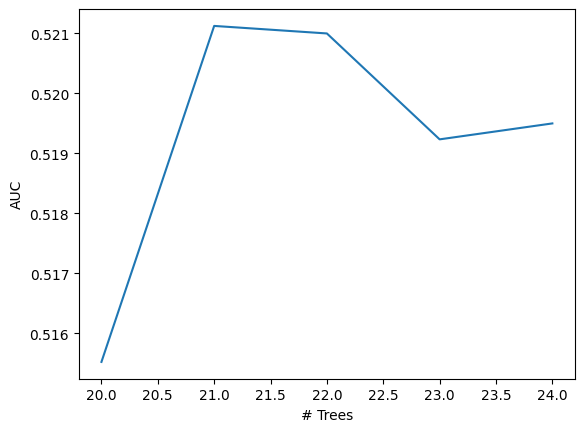

In [132]:
scores_rf = []
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    # print(f"Estimators: {n:>3}, AUC: {round(auc, 3)}")
    scores_rf.append((n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['n_estimators', 'auc'])
display(df_scores)

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("# Trees")
plt.ylabel("AUC")
plt.show()

`n_estimators`: 21

- `max_depth`

In [133]:
depth = [5, 10, 15, 20]

In [134]:
scores_rf = []
for d in depth:
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores_rf.append((d, n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['max_dpeth', 'n_estimators', 'auc'])
display(df_scores)

# plt.plot(df_scores., df_scores.auc)
# plt.xlabel("# Trees")
# plt.ylabel("AUC")
# plt.show()

,max_dpeth,n_estimators,auc
0,5,20,0.517884
1,5,21,0.510479
2,5,22,0.505701
3,5,23,0.506165
4,5,24,0.509360
5,10,20,0.503937
6,10,21,0.502083
7,10,22,0.500206
8,10,23,0.500439
9,10,24,0.496971


In [135]:
depth = [20, 25, 30]
scores_rf = []
for d in depth:
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores_rf.append((d, n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['max_dpeth', 'n_estimators', 'auc'])
display(df_scores)

,max_dpeth,n_estimators,auc
0,20,20,0.516566
1,20,21,0.521614
2,20,22,0.526149
3,20,23,0.526466
4,20,24,0.528820
5,25,20,0.511653
6,25,21,0.514623
7,25,22,0.513804
8,25,23,0.511833
9,25,24,0.510544


`max_depth`: 20, `n_estimators`: 24

- `min_sample_leaf`

In [136]:
leaves = [5, 10, 15, 20, 25]

In [137]:
scores_rf = []
for s in leaves:
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=20,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores_rf.append((s, n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['min_samples_leaf', 'n_estimators', 'auc'])
display(df_scores)

,min_samples_leaf,n_estimators,auc
0,5,20,0.501702
1,5,21,0.505697
2,5,22,0.504450
3,5,23,0.503710
4,5,24,0.506887
5,10,20,0.516546
6,10,21,0.509847
7,10,22,0.511436
8,10,23,0.509540
9,10,24,0.506163


In [138]:
leaves = [1, 2, 3, 4, 5]
scores_rf = []
for s in leaves:
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=20,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores_rf.append((s, n, auc))
df_scores = pd.DataFrame(scores_rf, columns = ['min_samples_leaf', 'n_estimators', 'auc'])
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                  columns='n_estimators',
                                  values='auc')
display(df_scores_pivot)

n_estimators,20,21,22,23,24
min_samples_leaf,,,,,
1,0.516566,0.521614,0.526149,0.526466,0.528820
2,0.494174,0.492409,0.493523,0.492663,0.489308
3,0.497667,0.495505,0.494180,0.491675,0.491904
4,0.504459,0.497835,0.498618,0.496007,0.498646
5,0.501702,0.505697,0.504450,0.503710,0.506887


`min_samples_leaf`: 1

- `max_features`

In [147]:
num_features = list(range(5, len(dv.get_feature_names_out()) + 1, 5)) + [None]

In [148]:
for f in num_features:
    rf = RandomForestClassifier(n_estimators=24, 
                                max_depth=20,
                                min_samples_leaf=1,
                                max_features=f,
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"# features: {f}, auc: {round(auc, 3)}")

# features: 5, auc: 0.471
# features: 10, auc: 0.48
# features: 15, auc: 0.493
# features: 20, auc: 0.492
# features: 25, auc: 0.504
# features: 30, auc: 0.515
# features: 35, auc: 0.51
# features: 40, auc: 0.501
# features: 45, auc: 0.503
# features: 50, auc: 0.494
# features: None, auc: 0.495


In [149]:
num_features = range(25, 35, 1)

In [150]:
for f in num_features:
    rf = RandomForestClassifier(n_estimators=24, 
                                max_depth=20,
                                min_samples_leaf=1,
                                max_features=f,
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"# features: {f}, auc: {round(auc, 3)}")

# features: 25, auc: 0.504
# features: 26, auc: 0.496
# features: 27, auc: 0.501
# features: 28, auc: 0.508
# features: 29, auc: 0.495
# features: 30, auc: 0.515
# features: 31, auc: 0.522
# features: 32, auc: 0.534
# features: 33, auc: 0.498
# features: 34, auc: 0.506


`max_features`: 32

Final Random Forest model:
```python
    rf = RandomForestClassifier(n_estimators=24, 
                                max_depth=20,
                                min_samples_leaf=1,
                                max_features=32,
                                random_state=1)
```

## XGBoost